In [30]:
import pickle as pkl
import torch
import os
import torch, lcasr
import matplotlib.pyplot as plt

In [31]:
def get_data(prefix, base_path='./'):
    in_dir = os.listdir(base_path)
    in_dir = [f for f in in_dir if f.startswith(prefix)]
    in_dir = sorted(in_dir)
    data = []
    for f in in_dir:
        with open(base_path + f, 'rb') as file:
            data.append(pkl.load(file))
    return data

In [32]:
wer_tedlium_test

[0.05791975240411186]

In [33]:
tedlium_test = get_data('ted_dev', base_path='./lm_beam1/')
wer_tedlium_test = [d['wer'] for d in tedlium_test]
print(f'{len(wer_tedlium_test)}/{len(tedlium_test)} completed')
sum(wer_tedlium_test)/len(wer_tedlium_test)

1/1 completed


0.05791975240411186

=========
NST EVALS
=========

In [105]:
epochs  = set([el.split("_")[1].split('-')[0] for el in os.listdir("./earningsNST/")])

dev_results = {'0':23.9}
test_results = {'0':18.3}
for epoch in epochs:
    for split in ['dev', 'test']:
        data = get_data(f'earnings22_{epoch}-{split}', base_path='./earningsNST/')
        if len(data) > 0 :
            if split == 'dev':
                dev_results[epoch] = data[0]['wer'] * 100
            else:
                test_results[epoch] = data[0]['wer'] *100

In [125]:
hours

[0.0,
 0.6916666666666667,
 1.3833333333333333,
 2.7666666666666666,
 5.533333333333333,
 11.066666666666666,
 13.971666666666668,
 16.6,
 19.366666666666667]

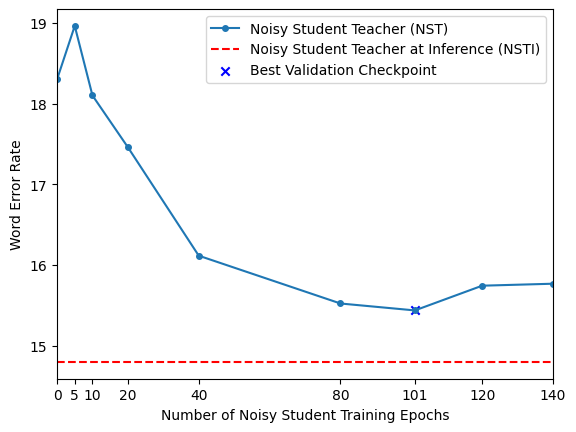

In [150]:
epochs = sorted([int(k) for k in test_results.keys() if k!="100"])

# make x axis log scale (base 2) on the following line

plt.plot(epochs, [test_results[str(e)] for e in epochs], label='Noisy Student Teacher (NST)', marker='o', markersize=4)
plt.xlabel('Number of Noisy Student Training Epochs')
plt.ylabel('Word Error Rate')
plt.xticks(epochs)

# Add a horizontal line at y=0.5
plt.axhline(y=14.8, color='red', linestyle='--', label='Noisy Student Teacher at Inference (NSTI)')

# Set the x-axis limits without padding
plt.xlim(epochs[0], epochs[-1])

# Add a point and annotate it with text
best_epoch = 101  # Replace with the actual best epoch
best_wer = test_results[str(best_epoch)]  # Replace with the actual best WER
plt.scatter(best_epoch, best_wer, color='blue', label='Best Validation Checkpoint', marker='x')

plt.legend()

plt.savefig('earnings_nst.pdf', bbox_inches='tight') 

# Show the plot
plt.show()




=========
Encoder Decoder Evals
=========

In [143]:
get_data('earnings22-test', base_path='./enc_dec_normal_eval/')[0]['wer']

0.3133794906357862